# Atividade 2.2 - Linear regression, p-value and metrics

**Curso:** Bacharelado em Ciência da Computação  
**Disciplina:** Matemática Computacional  
**Professor:** Claudomiro de Souza de Sales Junior
**Aluno:** Alessandro Reali Lopes Silva

---

## Esse Nootebook tem como objetivo apresentar a resolução da Atividade 2.2 - Linear regression, p-value and metrics
1. Correlação e Regressão Linear
2. Intervalo de Confiança
3. Teste de Hipótese (*p-value*)
4. Nível de Significância
5. Reprodução de Slides
6. Regressão e *R-Squared*
7. Fatoração LU
8. Método de Gauss-Jacobi
9. Método de Gauss-Seidel

In [460]:
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
from scipy.stats import sem, t, ttest_ind

def configurar_semente(aleatorio, seed_fixa=42):
    """
    Controla a aleatoriedade de todo o notebook.
    Se aleatorio=True, usa o relógio do sistema.
    Se aleatorio=False, usa a seed_fixa para garantir resultados iguais.
    """
    if aleatorio:
        np.random.seed(None)
        print(">> Modo: ALEATÓRIO (Resultados mudarão a cada execução)")
    else:
        np.random.seed(seed_fixa)
        print(f">> Modo: REPRODUTÍVEL (Seed Fixa: {seed_fixa})")

# Configuração estética dos gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 5]

### 1. Correlação e Regressão Linear

Nesta seção, exploramos o conceito de **Regressão Linear Simples**, que busca modelar a relação entre duas variáveis através de uma equação linear da forma:

$$y = ax + b + \epsilon$$

Onde:
* $a$ (slope): Coeficiente angular (inclinação).
* $b$ (intercept): Coeficiente linear (onde corta o eixo Y).
* $\epsilon$: Erro residual.

Analisaremos também:
1.  **Coeficiente de Correlação (r):** Mede a força e direção da relação linear.
2.  **P-value:** Testa a hipótese nula de que a inclinação é zero (sem relação).
3.  **Covariância:** Indica como as variáveis variam juntas.

In [461]:
def analisar_regressao_linear(x, y, titulo):
    """
    Realiza a regressão linear, calcula métricas e plota o gráfico.
    """
    # 1. Cálculo da Regressão Linear usando scipy
    # c_angular = inclinação (a), c_linear = c_linearo (b)
    # c_correlacao = coeficiente de correlação, p_value = teste de hipótese
    c_angular, c_linear, c_correlacao, p_value, erro_padrao = stats.linregress(x, y)
    
    # 2. Cálculo da Covariância
    # A função np.cov retorna uma matriz. [0,1] é a covariância entre x e y.
    matriz_cov = np.cov(x, y)
    covariancia = matriz_cov[0, 1]
    
    # 3. Criação da Reta de Regressão para o gráfico
    reta = c_angular * x + c_linear
    
    # 4. Plotagem
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Dados Observados', alpha=0.7, color='blue')
    plt.plot(x, reta, color='red', label=f'Reta: y={c_angular:.2f}x + {c_linear:.2f}')
    
    plt.title(f"{titulo}\nR²: {c_correlacao**2:.4f} | p-value: {p_value:.4e} | Cov: {covariancia:.4f}")
    plt.xlabel('Variável Independente (X)')
    plt.ylabel('Variável Dependente (Y)')
    plt.legend()
    plt.show()
    

    conclusao = "Existe relação estatisticamente significativa. Rejeita-se a hipótese nula." if p_value < 0.05 else "Não há evidência forte de relação linear."

    # 5. Exibição dos Dados Estatísticos
    display(Markdown(f"""### Estatísticas para: {titulo}
- **Equação da Reta:** y = {c_angular:.4f}x + {c_linear:.4f}
- **Coeficiente de Correlação (r):** {c_correlacao:.4f}
- **Coeficiente de Determinação (R²):** {c_correlacao**2:.4f}
- **P-value:** {p_value:.4e}
- **Covariância:** {covariancia:.4f}
- **Erro Padrão da Estimativa:** {erro_padrao:.4f}
- **Conclusão:** {conclusao}
"""))

>> Modo: REPRODUTÍVEL (Seed Fixa: 42)


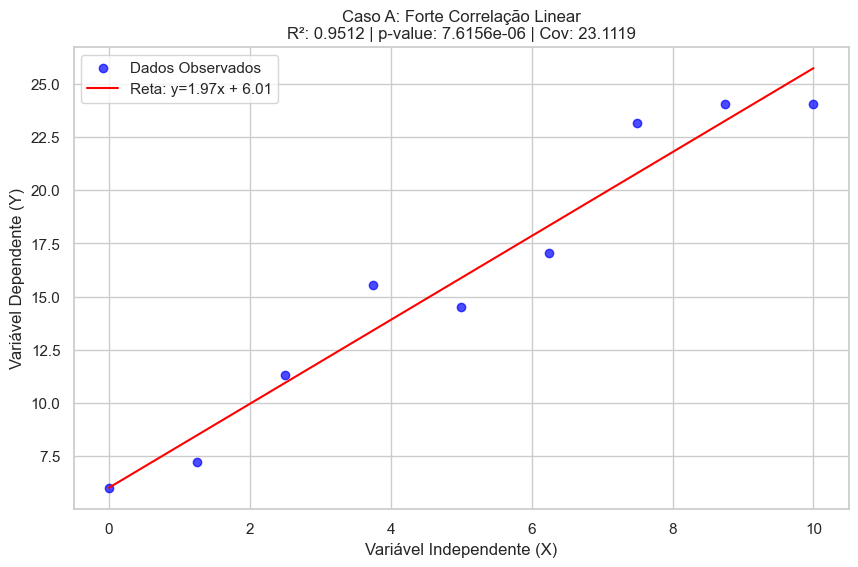

### Estatísticas para: Caso A: Forte Correlação Linear
- **Equação da Reta:** y = 1.9722x + 6.0140
- **Coeficiente de Correlação (r):** 0.9753
- **Coeficiente de Determinação (R²):** 0.9512
- **P-value:** 7.6156e-06
- **Covariância:** 23.1119
- **Erro Padrão da Estimativa:** 0.1688
- **Conclusão:** Existe relação estatisticamente significativa. Rejeita-se a hipótese nula.


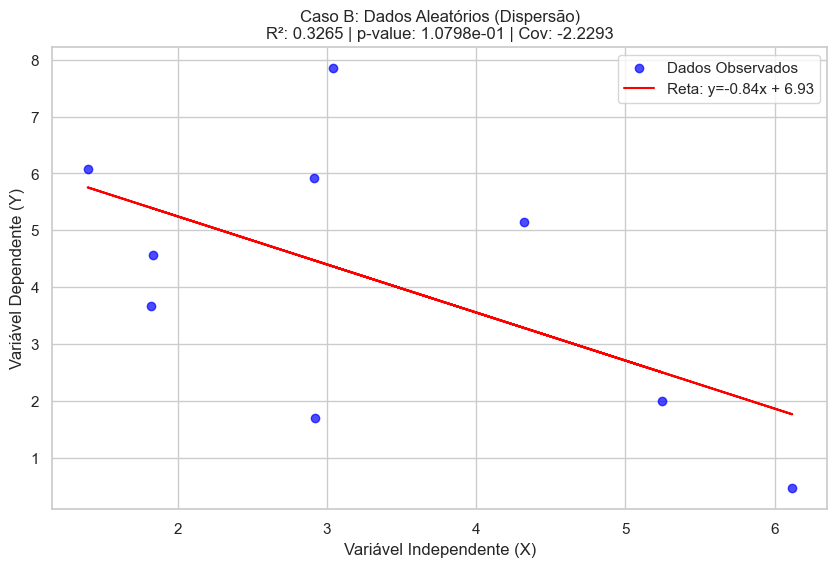

### Estatísticas para: Caso B: Dados Aleatórios (Dispersão)
- **Equação da Reta:** y = -0.8449x + 6.9334
- **Coeficiente de Correlação (r):** -0.5714
- **Coeficiente de Determinação (R²):** 0.3265
- **P-value:** 1.0798e-01
- **Covariância:** -2.2293
- **Erro Padrão da Estimativa:** 0.4586
- **Conclusão:** Não há evidência forte de relação linear.


In [462]:
# --- CONFIGURAÇÃO DA ALEATORIEDADE ---
configurar_semente(aleatorio=False)

QNT_PONTOS = 9  # Número de pontos a serem gerados
C_ANGULAR = 2   # Coeficiente angular da reta geradora dos dados sintéticos
C_LINEAR = 5    # Coeficiente linear da reta geradora dos dados sintéticos

# --- GERANDO OS DADOS PARA O TESTE ---

# Caso 1: Dados com forte correlação linear (Sintéticos)
x_linear = np.linspace(start=0, stop=10, num=QNT_PONTOS)
ruido = np.random.normal(loc=0, scale=2, size=QNT_PONTOS)
y_linear = C_ANGULAR * x_linear + C_LINEAR + ruido

# Caso 2: Dados Aleatórios (Sem correlação)
x_random = np.random.rand(QNT_PONTOS) * 10
y_random = np.random.rand(QNT_PONTOS) * 10

# --- EXECUTANDO A ANÁLISE ---
analisar_regressao_linear(x_linear, y_linear, "Caso A: Forte Correlação Linear")
analisar_regressao_linear(x_random, y_random, "Caso B: Dados Aleatórios (Dispersão)")

### 2. Intervalo de Confiança

Nesta seção, abordamos o item **B** da atividade. O objetivo é calcular e visualizar o **Intervalo de Confiança (IC)** para a média de um conjunto de dados.

O **Intervalo de Confiança** é uma estimativa de faixa que tem uma alta probabilidade (geralmente 95%) de conter o verdadeiro parâmetro da população (neste caso, a média real $\mu$), calculado a partir de estatísticas da amostra.

A fórmula geral para o cálculo do IC (usando a distribuição *t-Student*, ideal para amostras onde não conhecemos o desvio padrão da população) é:

$$IC = \bar{x} \pm t \cdot \frac{s}{\sqrt{n}}$$

Onde:
- **$\bar{x}$:** Média amostral.
- ***t*:** Valor crítico da distribuição *t-Student* (depende do nível de confiança e dos graus de liberdade).
- ***s*:** Desvio padrão amostral.
- ***n*:** Tamanho da amostra.
- **$\frac{s}{\sqrt{n}}$:** Erro Padrão da Média (Standard Error of the Mean - SEM).

Vamos analisar como a largura do intervalo muda conforme alteramos o **Nível de Confiança** (90%, 95%, 99%).

In [463]:
def analisar_intervalo_confianca(dados, niveis_confianca):
    """
    Calcula estatísticas descritivas e intervalos de confiança para diferentes níveis,
    plotando os resultados visualmente.
    """
    # 1. Estatísticas Básicas
    n = len(dados)
    media = np.mean(dados)
    desvio_padrao = np.std(dados, ddof=1) # ddof=1 para desvio amostral
    erro_padrao = sem(dados) # Standard Error of the Mean (s / sqrt(n))
    
    # 2. Relatório Inicial
    display(Markdown(f"""
### Análise Estatística da Amostra
- **Tamanho da Amostra (n):** {n}
- **Média Amostral ($\\bar{{x}}$):** {media:.4f}
- **Desvio Padrão (*s*):** {desvio_padrao:.4f}
- **Erro Padrão (SEM):** {erro_padrao:.4f}
"""))
    
    # 3. Cálculo dos Intervalos
    intervalos_plot = []
    margens_erro = []
    textos_resultado = "### Resultados dos Intervalos:\n"
    
    for confianca in niveis_confianca:
        # t.interval retorna (limite_inferior, limite_superior)
        # df = graus de liberdade (n - 1)
        lim_inf, lim_sup = t.interval(confianca, df=n-1, loc=media, scale=erro_padrao)
        
        margem = lim_sup - media
        margens_erro.append(margem)
        intervalos_plot.append((lim_inf, lim_sup))
        
        textos_resultado += f"- **IC {confianca*100:.0f}%:** [{lim_inf:.5f}, {lim_sup:.5f}] (Margem: $\\pm$ {margem:.4f})\n"
    
    display(Markdown(textos_resultado))
    
    # 4. Plotagem Gráfica
    plt.figure(figsize=(8, 5))
    
    # Plota a média como uma linha vertical pontilhada
    plt.axvline(media, color='black', linestyle='--', label=f'Média: {media:.2f}', alpha=0.6)
    
    # Eixo Y apenas para separar os níveis (0, 1, 2...)
    y_pos = np.arange(len(niveis_confianca))
    # Lista de X com o mesmo tamanho de Y, repetindo a média
    x_pos = [media] * len(niveis_confianca)
    
    # Plota as barras de erro
    # x = media (ponto central), xerr = margem (tamanho do braço)
    plt.errorbar(
        x=x_pos,
        y=y_pos,
        xerr=margens_erro,
        fmt='o',
        color='red',
        capsize=6,
        elinewidth=2,
        markeredgewidth=2,
        label='Intervalo de Confiança'
    )
    
    # Estética do Gráfico
    plt.yticks(y_pos, [f"{c*100:.0f}%" for c in niveis_confianca])
    plt.ylabel('Nível de Confiança')
    plt.xlabel('Valores da Amostra')
    plt.title(f'Intervalos de Confiança (n={n})')
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Adiciona os valores nas pontas das barras para facilitar leitura
    for i, margem in enumerate(margens_erro):
        plt.text(media + margem, i + 0.1, f"{media+margem:.5f}", va='center', fontsize=9, color='blue')
        plt.text(media - margem, i + 0.1, f"{media-margem:.5f}", va='center', fontsize=9, color='blue')

    margem = max(margens_erro) * 1.3

    plt.xlim(media - margem, media + margem)
    plt.ylim(-1, len(niveis_confianca))

    plt.show()

>> Modo: REPRODUTÍVEL (Seed Fixa: 42)



### Análise Estatística da Amostra
- **Tamanho da Amostra (n):** 30
- **Média Amostral ($\bar{x}$):** 1.7193
- **Desvio Padrão (*s*):** 0.1412
- **Erro Padrão (SEM):** 0.0258


### Resultados dos Intervalos:
- **IC 90%:** [1.67549, 1.76310] (Margem: $\pm$ 0.0438)
- **IC 95%:** [1.66657, 1.77202] (Margem: $\pm$ 0.0527)
- **IC 99%:** [1.64824, 1.79036] (Margem: $\pm$ 0.0711)
- **IC 93%:** [1.67080, 1.76780] (Margem: $\pm$ 0.0485)
- **IC 80%:** [1.68549, 1.75311] (Margem: $\pm$ 0.0338)


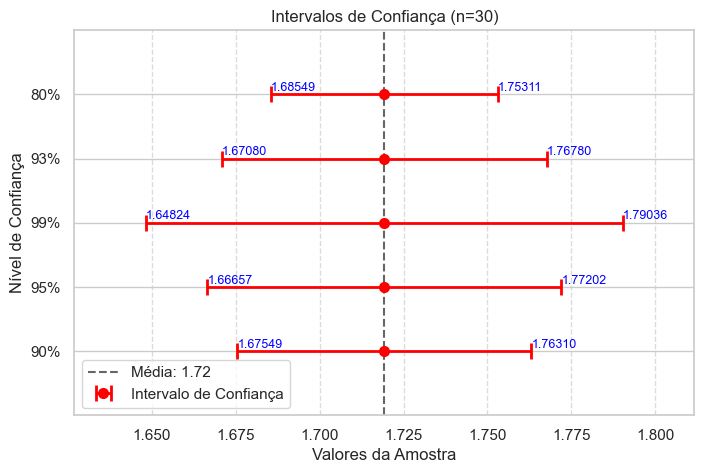

In [464]:
# --- CONFIGURAÇÃO DA ALEATORIEDADE ---
configurar_semente(aleatorio=False)

# Níveis de confiança exigidos pelo slide (geralmente 90%, 95%, 99%, ...)
NIVEIS_CONFIANCA = [0.90, 0.95, 0.99, 0.93, 0.80]
QUANTIDADE = 30
MIN = 1.50
MAX = 2.00

dados = np.random.uniform(low=MIN, high=MAX, size=QUANTIDADE)

# --- EXECUTANDO A ANÁLISE ---
analisar_intervalo_confianca(dados, NIVEIS_CONFIANCA)

### 3. Teste de Hipótese (*p-value*)

Nesta seção, resolvemos a **Questão C**. O objetivo é realizar um teste de hipótese para verificar se existe uma diferença estatisticamente significativa entre as médias de dois grupos independentes (ex: Grupo Controle vs. Grupo Experimental).

Utilizaremos o **Teste T para amostras independentes** (*Independent Samples t-test*).

As hipóteses são:
* **$H_0$ (Hipótese Nula):** As médias dos dois grupos são iguais ($\mu_1 = \mu_2$). Não há efeito.
* **$H_1$ (Hipótese Alternativa):** As médias dos dois grupos são diferentes ($\mu_1 \neq \mu_2$).

A decisão é baseada no ***p-value*** com um nível de significância ($\alpha$) de 0.05:
* Se $p\text{-value} < 0.05$: Rejeitamos $H_0$ (A diferença é significativa).
* Se $p\text{-value} \ge 0.05$: Não rejeitamos $H_0$ (Não há evidência suficiente para dizer que são diferentes).

In [465]:
def analisar_teste_hipotese(grupo_controle, grupo_teste, alpha=0.05):
    """
    Realiza o Teste T para duas amostras independentes e visualiza as distribuições.
    """
    # 1. Estatísticas Básicas
    media_c = np.mean(grupo_controle)
    std_c = np.std(grupo_controle, ddof=1)
    
    media_t = np.mean(grupo_teste)
    std_t = np.std(grupo_teste, ddof=1)
    
    # 2. Execução do Teste T (t-test)
    t_stat, p_value = ttest_ind(grupo_controle, grupo_teste, equal_var=False)
    
    display(Markdown(f"""
### Estatísticas Descritivas
| Grupo | Média | Desvio Padrão | n |
| --- | --- | --- | --- |
| Controle | {media_c:.4f} | {std_c:.4f} | {len(grupo_controle)} |
| Teste | {media_t:.4f} | {std_t:.4f} | {len(grupo_teste)} |

### Resultados do Teste T
- **Estatística T:** {t_stat:.4f}
- **P-value:** {p_value:.4e}"""
    ))
    
    # 3. Interpretação
    if p_value < alpha:
        conclusao = f"**REJEITAMOS a Hipótese Nula ($H_0$).**\nHá evidência estatística de que as médias são diferentes (p < {alpha})."
        cor_resultado = "green"
    else:
        conclusao = f"**NÃO REJEITAMOS a Hipótese Nula ($H_0$).**\nNão há evidência suficiente para afirmar que as médias são diferentes (p >= {alpha})."
        cor_resultado = "red"
        
    display(Markdown(f"> Conclusão: <span style='color:{cor_resultado}'>{conclusao}</span>"))
    
    # 4. Visualização (Histograma + KDE)
    plt.figure(figsize=(10, 6))
    
    # Plotamos os histogramas com curva de densidade (kde) usando seaborn
    sns.histplot(grupo_controle, color="blue", label="Controle", kde=True, stat="density", alpha=0.4)
    sns.histplot(grupo_teste, color="orange", label="Teste", kde=True, stat="density", alpha=0.4)
    
    # Linhas verticais para as médias
    plt.axvline(media_c, color='blue', linestyle='--', linewidth=2, label=f'Média Controle: {media_c:.2f}')
    plt.axvline(media_t, color='orange', linestyle='--', linewidth=2, label=f'Média Teste: {media_t:.2f}')
    
    plt.title(f'Comparação de Distribuições\n(p-value: {p_value:.4e})')
    plt.xlabel('Valor')
    plt.ylabel('Densidade')
    plt.legend()
    plt.show()

>> Modo: REPRODUTÍVEL (Seed Fixa: 42)



### Estatísticas Descritivas
| Grupo | Média | Desvio Padrão | n |
| --- | --- | --- | --- |
| Controle | 49.9958 | 10.0017 | 50000 |
| Teste | 48.9347 | 11.3585 | 500 |

### Resultados do Teste T
- **Estatística T:** 2.0808
- **P-value:** 3.7957e-02

> Conclusão: <span style='color:green'>**REJEITAMOS a Hipótese Nula ($H_0$).**
Há evidência estatística de que as médias são diferentes (p < 0.05).</span>

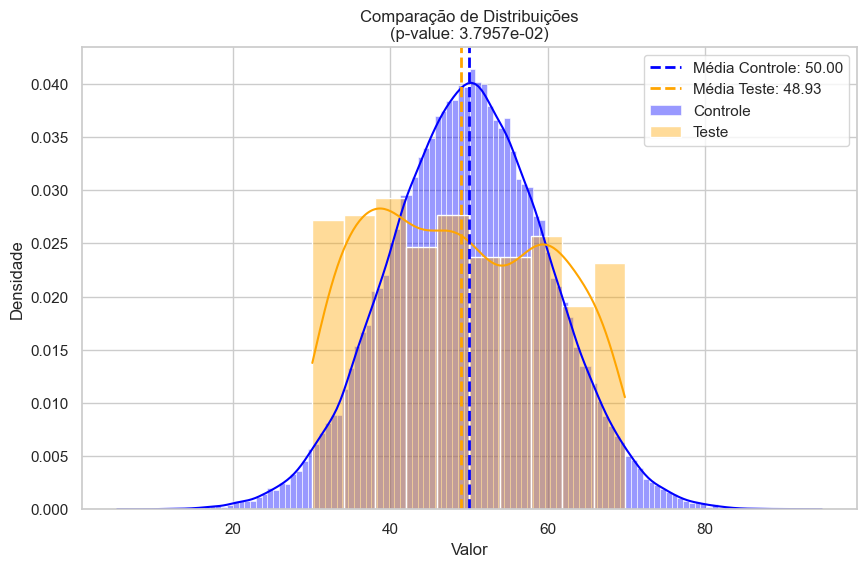

In [466]:
# --- CONFIGURAÇÃO DA ALEATORIEDADE ---
configurar_semente(aleatorio=False)

ALPHA = 0.05
MEDIA = 50
QUANTIDADE = 500
DESVIO = 10


# Grupo Controle
controle = np.random.normal(loc=MEDIA, scale=DESVIO, size=QUANTIDADE * 100)

# Grupos de Teste
# Distribuição Uniforme [60, 80]
teste_uniforme = np.random.uniform(low=MEDIA - 2 * DESVIO, high=MEDIA + 2 * DESVIO, size=QUANTIDADE)

# --- EXECUTANDO AS ANÁLISES ---
analisar_teste_hipotese(controle, teste_uniforme, ALPHA)

### 4. Nível de Significância

Nesta seção, abordamos o item **D** da atividade. O objetivo é compreender o papel do **Nível de Significância** ($\alpha$) na tomada de decisão estatística.

O nível de significância é um limite pré-definido (geralmente 0.05) que determina quando rejeitamos a Hipótese Nula ($H_0$). Ele representa a probabilidade máxima de cometer um **Erro Tipo I** (rejeitar $H_0$ quando ela é verdadeira, ou seja, um "falso positivo").

A regra de decisão é comparativa:

| Comparação | Decisão | Interpretação |
| :--- | :--- | :--- |
| **p-value < $\alpha$** | **Rejeitar $H_0$** | O resultado é estatisticamente significativo. |
| **p-value $\ge$ $\alpha$** | **Não Rejeitar $H_0$** | Não há evidência suficiente para rejeitar a hipótese nula. |

No código a seguir, analisaremos como a alteração do valor de `significance_level` ($\alpha$) pode mudar a conclusão de um teste, mesmo mantendo o mesmo *p-value* obtido nos dados.

In [467]:
def analisar_impacto_alpha(grupo_controle, grupo_teste, niveis_alpha=[0.01, 0.05, 0.10]):
    """
    Realiza um único Teste T e verifica a decisão para diferentes níveis de significância.
    Mostra que o MESMO resultado pode ser aceito ou rejeitado dependendo do rigor do cientista.
    """
    # 1. Executa o teste estatístico (Calcula o p-value)
    _, p_value = ttest_ind(grupo_controle, grupo_teste, equal_var=False)
    
    # 2. Exibe os dados do experimento
    media_c = np.mean(grupo_controle)
    media_t = np.mean(grupo_teste)
    
    resposta = [
        "### Resultado do Experimento",
        f"- **Média Controle:** {media_c:.2f} | **Média Teste:** {media_t:.2f}",
        f"- **P-value calculado:** `{p_value:.4f}`",
        "### Tomada de Decisão para diferentes Alphas"
    ]

    # 3. Loop de Decisão (A "Peneira")
    for alpha in niveis_alpha:
        if p_value < alpha:
            status = "REJEITA H0 (Significativo)"
            cor = "red"
        else:
            status = "ACEITA H0 (Não Significativo)"
            cor = "green"
        
        resposta.append(f"- **Alpha = {alpha} (Rigor de {(1-alpha)*100:.0f}%):** <span style='color:{cor}; font-weight:bold'>{status}</span>")
    
    display(Markdown("\n".join(resposta)))

    # 4. Visualização Gráfica
    plt.figure(figsize=(10, 6))
    
    # A. Função Constante do P-value (Linha Horizontal)
    plt.axhline(y=p_value, color='blue', linestyle='-', linewidth=2, label=f'P-value Constante ({p_value:.4f})')
    
    # B. Pontos dos Alphas
    for alpha in niveis_alpha:
        if p_value < alpha:
            cor = 'red'
            decisao = "Rejeita H0"
        else:
            cor = 'green'
            decisao = "Aceita H0"
            
        plt.scatter(alpha, alpha, color=cor, s=150, zorder=5, label=f'Alpha = {alpha}')
        
         # Linhas verticais para conectar ao eixo X            
        plt.vlines(x=alpha, ymin=0, ymax=alpha, color=cor, linestyle=':', alpha=0.5)
        
        # Texto de decisão no gráfico
        plt.text(alpha, alpha + 0.005, decisao, ha='center', fontsize=9, fontweight='bold')

    # Ajustes Finais
    plt.title('Comparação Visual: Linha do P-value vs Níveis de Alpha')
    plt.xlabel('Níveis de Significância (Alpha)')
    plt.ylabel('Probabilidade')
    
    # Garante que o gráfico mostre desde 0 até um pouco acima do maior valor
    max_y = max(max(niveis_alpha), p_value)
    plt.ylim(0, max_y + 0.02)
    plt.xticks(niveis_alpha) # Mostra apenas os alphas no eixo X
    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()

>> Modo: REPRODUTÍVEL (Seed Fixa: 42)


### Resultado do Experimento
- **Média Controle:** 96.88 | **Média Teste:** 104.17
- **P-value calculado:** `0.0252`
### Tomada de Decisão para diferentes Alphas
- **Alpha = 0.01 (Rigor de 99%):** <span style='color:green; font-weight:bold'>ACEITA H0 (Não Significativo)</span>
- **Alpha = 0.05 (Rigor de 95%):** <span style='color:red; font-weight:bold'>REJEITA H0 (Significativo)</span>
- **Alpha = 0.1 (Rigor de 90%):** <span style='color:red; font-weight:bold'>REJEITA H0 (Significativo)</span>

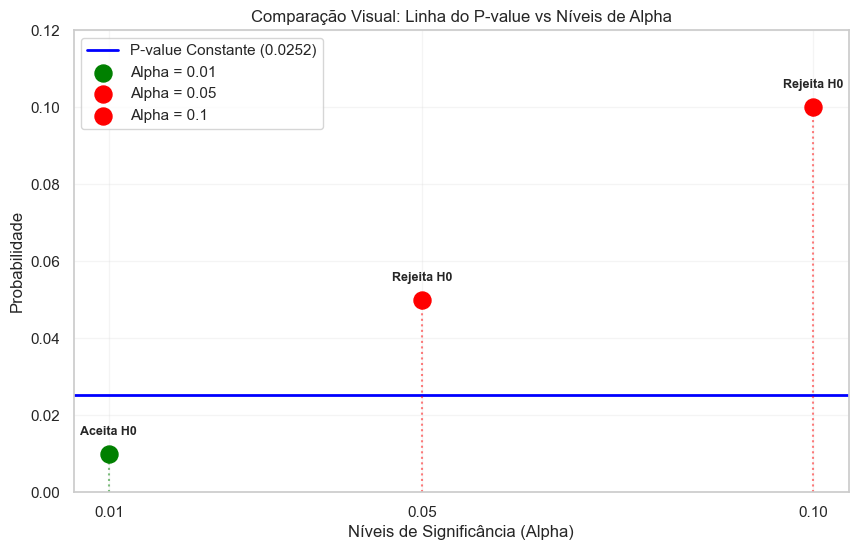

In [468]:
# --- CONFIGURAÇÃO ---
configurar_semente(aleatorio=False)

QUANTIDADE = 100
MEDIA = 100
MEDIA_TESTE = MEDIA + 5
DESVIO = 30

# Dados do Grupo Controle
grupo_controle = np.random.normal(loc=MEDIA, scale=DESVIO, size=QUANTIDADE)

# Dados do Grupo Teste (Cenário "Zona Cinzenta")
grupo_teste_polemico = np.random.uniform(low=MEDIA_TESTE-DESVIO, high=MEDIA_TESTE+DESVIO,size=QUANTIDADE)

# --- ANÁLISE ---
# Vamos testar contra os níveis clássicos: 1% (Muito Rigoroso), 5% (Padrão) e 10% (Relaxado)
analisar_impacto_alpha(grupo_controle, grupo_teste_polemico, niveis_alpha=[0.01, 0.05, 0.1])